In [1]:
# https://networkx.github.io/documentation/stable/reference/algorithms/index.html

import matplotlib.pyplot as plt
import community  # pip install python-louvain
import networkx as nx
from networkx.algorithms import community as com
from sklearn.cluster import SpectralClustering

G = nx.karate_club_graph()
N = G.number_of_nodes()
M = G.number_of_edges()
pos = nx.spring_layout(G)

In [2]:
def modularity(G, values):
    """
        G : Graph
        values : community_num
    """
    n = G.number_of_nodes()
    m = G.number_of_edges()
    degree = []
    for i in range(n):
        degree.append(G.degree(i))
    
    Q = 0
    for i in range(n):
        for j in range(n):
            if (i != j and values[i] == values[j]):
                if (G.has_edge(i, j)):
                    Q += 1 - degree[i]*degree[j]/(2*m)
                else:
                    Q -= degree[i]*degree[j]/(2*m)
    Q /= (2*m)
    return Q

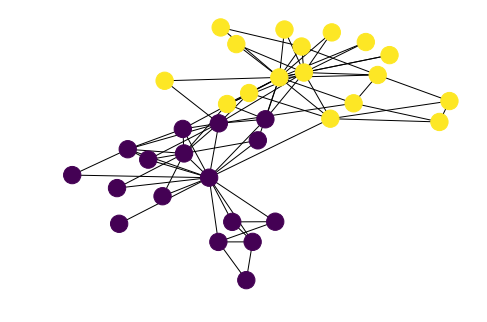

modularity: 0.4080374753451658


In [3]:
# True Community
true_v = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
nx.draw(G, pos, node_color=true_v)
plt.show()
mod = modularity(G, true_v)
print("modularity: {0}".format(mod))

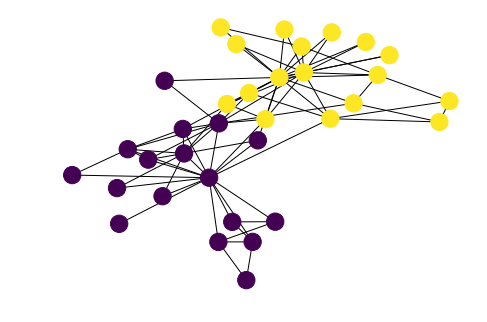

modularity: 0.4215976331360928


In [4]:
# Kernighan_Lin Algorithm
# Source : https://github.com/networkx/networkx/blob/master/networkx/algorithms/community/kernighan_lin.py
partition = com.kernighan_lin_bisection(G)
values = [0 for _ in range(N)]
for p in partition[0]:
    values[p] = 1

nx.draw(G, pos, node_color=values)
plt.show()
mod = modularity(G, values)
print("modularity: {0}".format(mod))

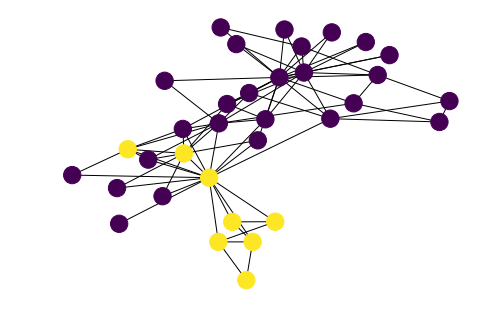

In [5]:
# Spectral Clustering
# Source : https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/cluster/spectral.py
adj_mat = nx.to_numpy_matrix(G)
sc = SpectralClustering(2, affinity='precomputed')
sc.fit(adj_mat)
nx.draw(G, pos, node_color=sc.labels_)
plt.show()

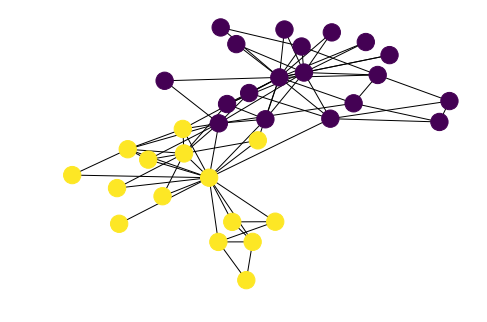

modularity: 0.4097633136094655


In [6]:
# Girvan Newman method
# Source : https://github.com/networkx/networkx/blob/master/networkx/algorithms/community/centrality.py
comp = com.girvan_newman(G)
val = list(sorted(c) for c in next(comp))
values = [0 for _ in range(N)]
for i in val[0]:
    values[i] = 1
nx.draw(G, pos, node_color=values)
plt.show()
mod = modularity(G, values)
print("modularity: {0}".format(mod))

In [1]:
# Greedy Modularity Maximization
# Clauset
# Wakita Tsurumi
# Blondel (Hierarchical)